#Data Cleaning and Training



#Fish Recognizer

##Types
"Hilsa Fish",
"Rohu Fish",
"Catla Fish",
"Barramundi Fish",
"Mrigal Carp Fish",
"Indian Featherback Fish",
"Salmon Fish",
"Pabda Catfish",
"Silver Pomfret",
"Bombay Duck Fish"

###Setup


In [ ]:
%matplotlib inline
bs = 32
version = 8

In [ ]:
!pip install -Uqq fastai

In [ ]:
import sys; print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
pip list


Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.1
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.0
altair                                   5.5.0
annotated-doc                            0.0.3
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.18
argon2-cffi                        

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse_Data_Science/Project_1

/content/drive/My Drive/MasterCourse_Data_Science/Project_1


In [ ]:
batch_tfms = [*aug_transforms(mult=2, do_flip=True, pad_mode='reflection', max_lighting=0.1, max_zoom=1.1, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', align_corners=True, batch=False, min_scale=1.0), Normalize.from_stats(*imagenet_stats)]
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.1, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128),
)


###Load...

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=batch_tfms)
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/fish_dataloader_v{version}.pkl")

In [ ]:
dls.train.vocab

['Barramundi Fish', 'Bombay Duck Fish', 'Catla Fish', 'Hilsa Fish', 'Indian Featherback Fish', 'Mrigal Carp Fish', 'Pabda Catfish', 'Rohu Fish', 'Salmon Fish', 'Silver Pomfret']

In [ ]:
dls = torch.load(f"dataloaders/fish_dataloader_v8.pkl")

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL fastai.data.core.DataLoaders was not an allowed global by default. Please use `torch.serialization.add_safe_globals([fastai.data.core.DataLoaders])` or the `torch.serialization.safe_globals([fastai.data.core.DataLoaders])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


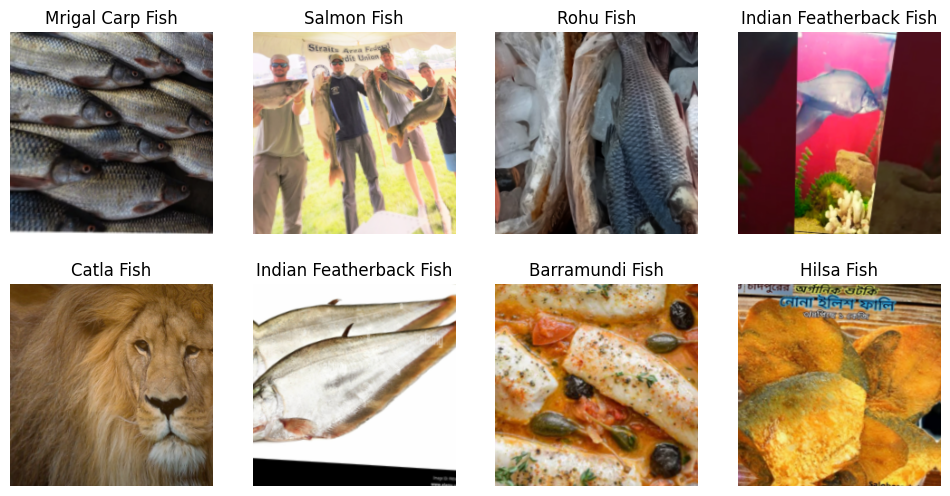

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


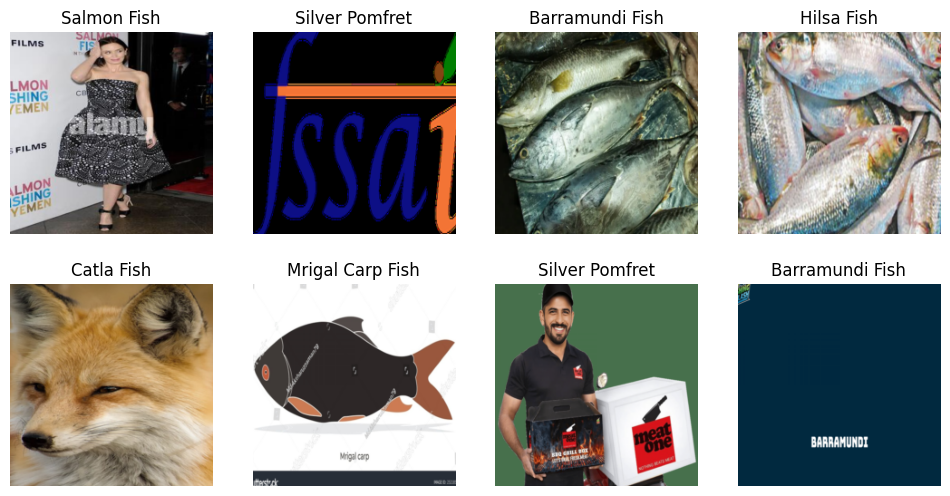

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

###Training and Data Cleaning


In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy]) #after rebuilding dls

In [ ]:
model.load(f"fish-recognizer-v{version-1}")

In [ ]:
epoch = 5
model.fine_tune(epoch)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

In [ ]:
model.save(f"fish-recognizer-v{version}")

Path('models/fish-recognizer-v8.pth')

In [ ]:
# model.load(f"vehicle-recognizer-v{version}")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


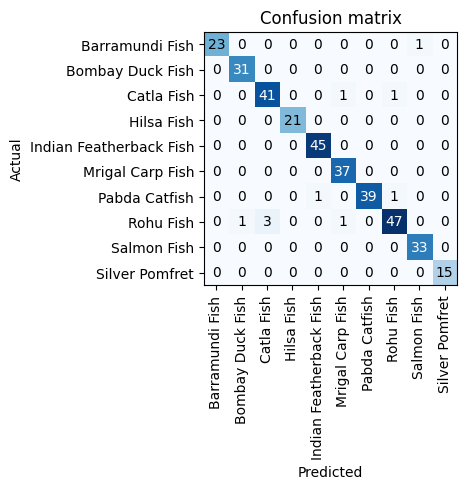

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix() #Salmon, Silver Pomfret, HIlsa

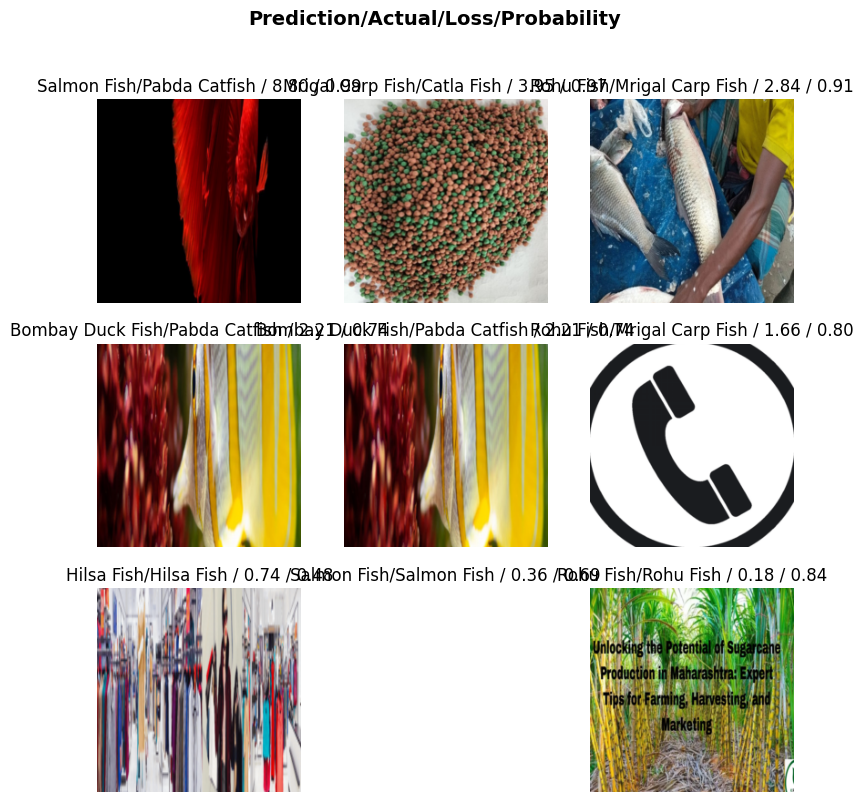

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory


In [ ]:
image_counts = get_image_files("data")
image_counts

(#3415) [Path('data/Hilsa Fish/cf810620-d678-4951-bea6-ea73da08db4c.png'),Path('data/Hilsa Fish/0c2f4eb9-71f6-4e1d-98de-eee8263b12ab.jpg'),Path('data/Hilsa Fish/56fb0945-ccc2-4a18-80e4-77d9bd7a7e28.jpg'),Path('data/Hilsa Fish/5447006a-052e-4ab0-a52e-5c51d2ad2ea9.png'),Path('data/Hilsa Fish/7bf82636-b4c9-4862-a518-29fc39abdeb5.jpg'),Path('data/Hilsa Fish/dbc1409e-36f9-43f3-b0eb-d1fecb2eb5fe.jpg'),Path('data/Hilsa Fish/4af651f6-6b67-44be-b273-3608390c3b31.jpg'),Path('data/Hilsa Fish/076b02f4-5f14-4b11-a9ff-3a2df42a5997.jpg'),Path('data/Hilsa Fish/a980ca7f-bd1e-4a41-9803-63416f564c23.png'),Path('data/Hilsa Fish/9cc201c2-e251-42a9-a092-5a16e19ad8ee.jpg'),Path('data/Hilsa Fish/594add9b-77ac-468b-bfed-510d833efd40.jpg'),Path('data/Hilsa Fish/c7ed7ee1-4f4f-4f7e-ac6f-b8e1b8287cb0.jpg'),Path('data/Hilsa Fish/917080b4-20eb-44f1-a1a0-66ac450d985b.png'),Path('data/Hilsa Fish/ac3b9b47-6fc7-42c4-8232-206f5f8e8d97.jpg'),Path('data/Hilsa Fish/c7d5e17d-3bad-49c4-8344-98dc839a03b6.jpg'),Path('data/Hilsa

In [ ]:
model.export(f"{model_path}/fish-recognizer-v{version}.pkl")